# Task 3: Heart Disease Prediction

**Objective:**  
To build a classification model that predicts whether a patient is at risk of heart disease based on health data.

**Dataset:**  
UCI Heart Disease Dataset from Kaggle.



## Step 1: Import Required Libraries

We import essential Python libraries for:
- Data handling (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine learning models and evaluation (`scikit-learn`)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


## Step 2: Load the Dataset

We load the CSV file `heart.csv` into a pandas DataFrame and display the first few rows to understand the structure.


In [8]:
# Load the CSV file
data = pd.read_csv(r"C:\Users\CS\Downloads\heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Step 3: Data Exploration and Cleaning

We check for:
- Missing values
- Data types
- Basic descriptive statistics

If missing values are found, we handle them accordingly.


In [9]:
# Check for nulls
print(data.isnull().sum())

# Dataset overview
data.info()## Step 4: Exploratory Data Analysis (EDA)

# Basic stats
data.describe()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Step 4: Exploratory Data Analysis (EDA)

We analyze the dataset using visualizations to discover:
- Distribution of the target variable (`target`)
- Correlations between features
- Relationships between features and heart disease risk


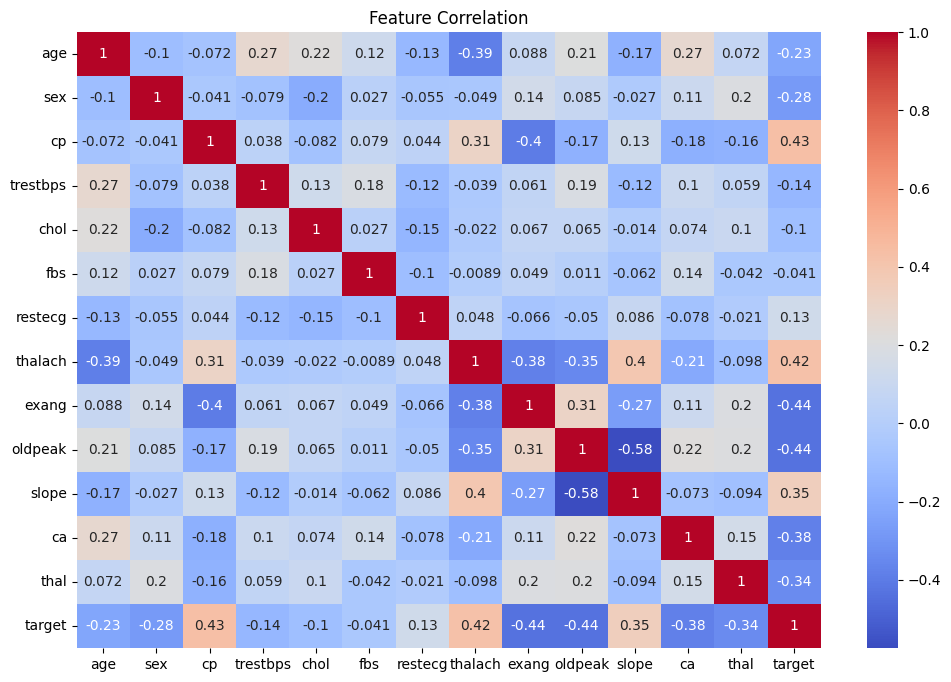

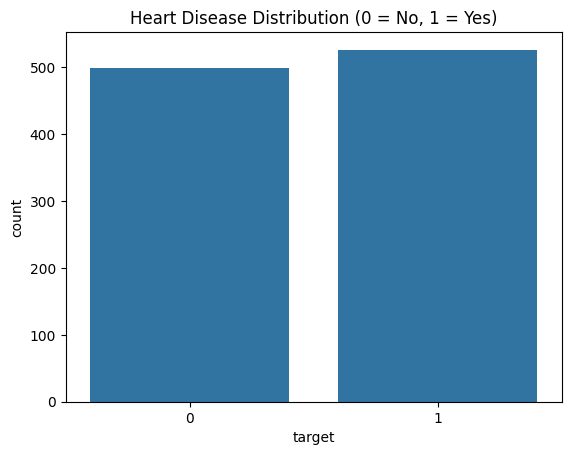

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Target count
sns.countplot(data=data, x='target')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


## Step 5: Prepare Features and Target

We define:
- `X`: all input features
- `y`: the target label (`target` column) indicating heart disease risk


In [11]:
X = data.drop('target', axis=1)
y = data['target']


## Step 6: Train-Test Split

We split the data into training and testing sets using an 80/20 split ratio.
This allows us to train the model and evaluate it on unseen data.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Train the Logistic Regression Model

We use **Logistic Regression**, a popular classification algorithm used for binary problems like heart disease prediction.

Logistic Regression estimates the probability that a given input belongs to a certain class — in our case:
- `1` = patient **has** heart disease
- `0` = patient **does not have** heart disease

The model is trained using the features (`X_train`) and labels (`y_train`).  
It attempts to find the best-fitting sigmoid curve to separate the two classes.


In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Step 8: Model Predictions and Accuracy

We make predictions on the test dataset and evaluate the model using **accuracy score**.
This tells us the percentage of correct predictions.


In [14]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7951219512195122


## Step 9: Confusion Matrix and Classification Report

We use:
- **Confusion matrix**: to analyze true vs predicted outcomes
- **Classification report**: to view precision, recall, F1-score for each class


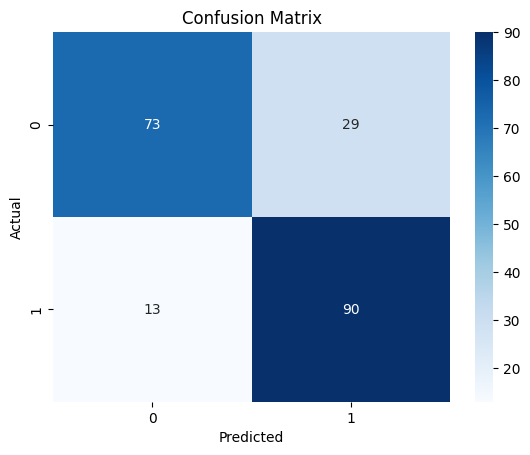

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


## Step 10: ROC Curve and AUC Score

We generate the ROC curve to evaluate how well the model distinguishes between positive (disease) and negative (no disease) cases.  
The AUC (Area Under Curve) value represents the model’s performance — closer to 1 means better.


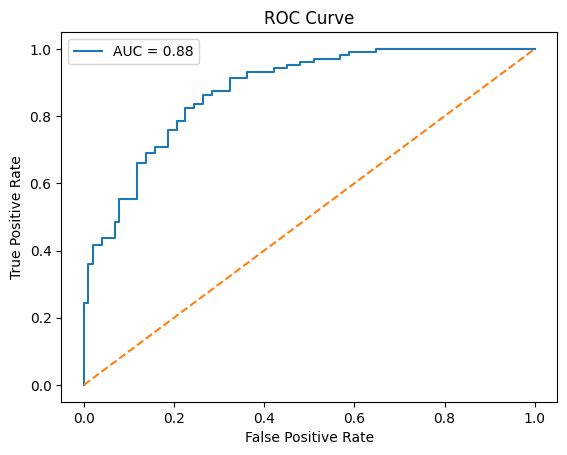

In [16]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Final Observations

- The classification model (Logistic Regression) achieved good accuracy on the test set.
- The ROC curve and AUC score show the model is effective in distinguishing between risky and non-risky patients.
- The confusion matrix shows a balanced prediction for both classes.
- Important features in predicting heart disease include:
  - `cp` (chest pain type)
  - `thalach` (maximum heart rate)
  - `oldpeak` (ST depression)
